# Работа 1. Основы моделирования систем управления

## 1. Система:  
$4. (1 + b p) x = c (1 + a p) y$

## 2. Передаточная функция:  
$W(s) = \frac{1 + b s}{c(1 + a s)}$

## 3. АЧХ и ФЧХ
По формулам $A(w) = |W(j w)|$ и $\phi(w) = arg(W(j w))$ получаем (считаем $a, b, c$ вещественными):  
$A(w) = \frac{1}{|c|} \sqrt{\frac{1 + b^2 w^2}{1 + a^2 w^2}}$  
  
$\phi(w) = \arctan{\frac{(b - a) w}{1 + a b w^2}}$

## 4. Модель системы
Возьмём $a = 3, b = 1, c = 2$

Задаём систему

In [31]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [32]:
a, b, c = 3, 1, 2

sys = signal.lti([b, 1], [a*c, c])

## 5. Сигналы с разными амплитудами и постоянной частотой

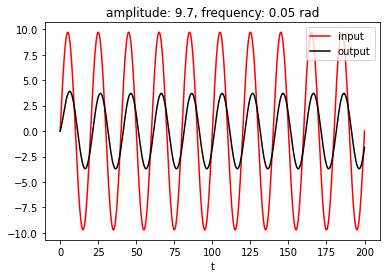

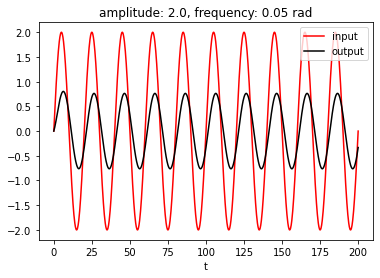

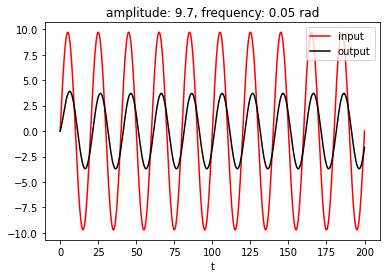

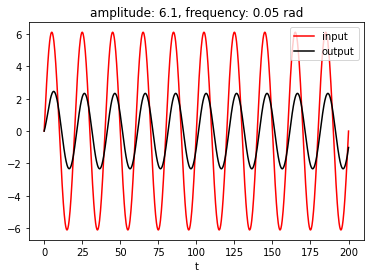

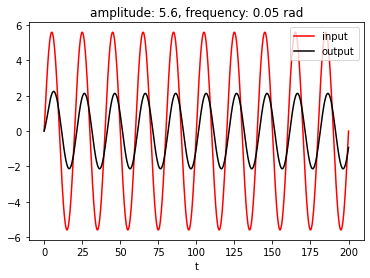

In [33]:
# выберем частоту сигнала
freq = 0.05
# зададим моменты времени
t = np.linspace(0, 10.0/freq, 1001)
# вспомогательный массив - аргумент входной синусоиды
rt = 2 * np.pi * freq * t

for _ in range(5):
    # задаём входной сигнал
    amp = round(10 * np.random.rand() + 0.5, 1)
    sig = amp * np.sin(rt)
    # пропускаем через систему
    tout, yout, xout = signal.lsim(sys, sig, t)
    # выводим входной и выходной сигналы
    plt.figure()
    plt.plot(t, sig, color='red', label='input')
    plt.plot(tout, yout, color='black', label='output')
    plt.title('amplitude: ' + str(amp) + ', frequency: ' + str(freq) + ' rad')
    plt.legend(loc=0)
    plt.xlabel('t')
    plt.show()

Как видно из графиков, отношение амплитуд входного и выходного сигнала и сдвиг по фазе остаются постоянными при разных амплитудах и заданной частоте

## 6. Сигналы с разными частотами и постоянной амплитудой

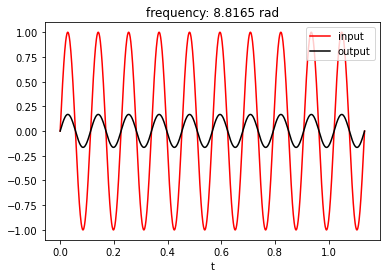

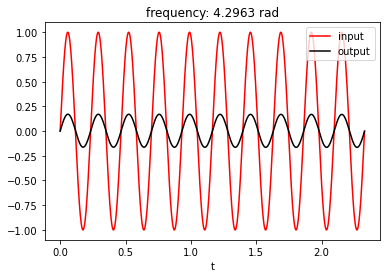

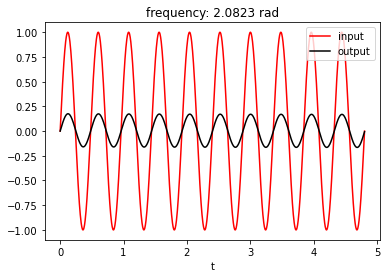

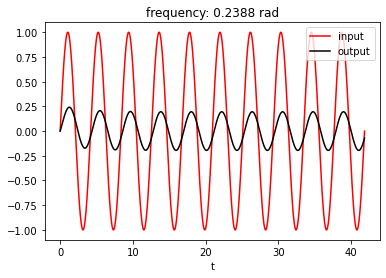

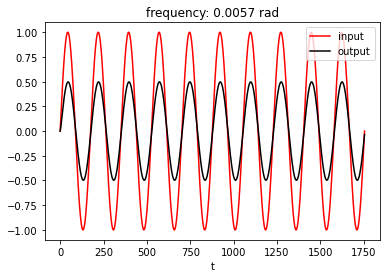

In [34]:
for _ in range(5):
    # задаём частоту
    freq = round(np.power(10, 4 * np.random.rand() - 3), 4)
    # зададим моменты времени
    t = np.linspace(0, 10.0/freq, 1001)
    # задаём входной сигнал;
    # амплитуду входного сигнала будем считать равной 1
    sig = np.sin(2*np.pi*freq*t)
    # пропускаем через систему
    tout, yout, xout = signal.lsim(sys, sig, t)
    # выводим входной и выходной сигналы
    plt.figure()
    plt.plot(t, sig, color='red', label='input')
    plt.plot(tout, yout, color='black', label='output')
    plt.title('frequency: ' + str(freq) + ' rad')
    plt.legend(loc=0)
    plt.xlabel('t')
    plt.show()

В зависимости от частоты меняется как отношение входного и выходного сигналов, так и сдвиг по фазе

## 7. Вычисленные и экспериментальные АЧХ и ФЧХ

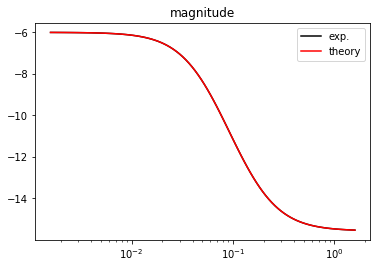

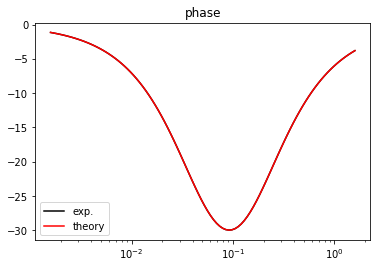

In [35]:
# теоретическая амплитудно-частотная характеристика
mag_th = lambda w: 10 * np.log10(0.25 * (1 + np.power(w, 2)) / (1 + 9*np.power(w, 2)))

# теоретическая фазово-частотная характеристика(в градусах)
phase_th = lambda w: - 180 / np.pi *np.arctan(2 * w / (1 + 3*np.power(w, 2)))

# создаём диаграмму Боде
w, mag, phase = signal.bode(sys)
# переводим циклическую частоту в обычную
fs = w / 2 / np.pi

# рисуем графики амплитудно-частотной характеристики
plt.figure()
plt.semilogx(fs, mag, label='exp.', color='black')
plt.semilogx(fs, mag_th(w), label='theory', color='red')
plt.title('magnitude')
plt.legend(loc=0)
# графики фазово-частотной характеристики
plt.figure()
plt.semilogx(fs, phase, label='exp.', color='black')
plt.semilogx(fs, phase_th(w), label='theory', color='red')
plt.title('phase')
plt.legend(loc=0)
plt.show()

Теоретические и экспериментальные частотные характеристики полностью совпадают

## 8. Переходная функция системы

Рассчитаем переходную функцию системы по формуле:  
    $h(t) = C + \sum\limits_{i=1}^n Res(W(s) \frac{e^{st}}{s})|_{s=\lambda_i}$  

Имеем единственный вычет в точке $s = - \frac{1}{3}$; в итоге получим (с учётом исходного дифференциального уравнения)  
    $h(t) = \frac{1}{2} - \frac{e^{-\frac{t}{3}}}{3}$

## 9. Реакция на ступенчатое воздействие

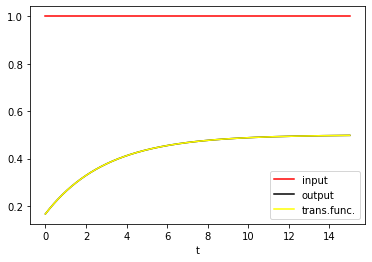

In [36]:
# переходная функция
h = lambda t: 1/2 - np.exp(-t/3)/3

# задаём временной интервал
t = np.linspace(0, 15.0, 1001)
# задаём входной сигнал;
sig = np.ones(t.size)
# пропускаем через систему
tout, yout, xout = signal.lsim(sys, sig, t)
# выводим входной и выходной сигналы
plt.figure()
plt.plot(t, sig, color='red', label='input')
plt.plot(tout, yout, color='black', label='output')
plt.plot(tout, h(tout), color='yellow', label='trans.func.')
plt.legend(loc=0)
plt.xlabel('t')
plt.show()

Реакция на единичное ступенчатое воздействие совпадает с переходной функцией